<a href="https://colab.research.google.com/github/AJyothi001/FMLLAB/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df=pd.read_csv("/content/archive (6).zip")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [16]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale=pd.DataFrame(scale,columns=['Annual Income (k$)','Spending Score (1-100)'])
df_scale.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [37]:
km=KMeans(n_clusters=2)
y_predict=km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predict
km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.37861485, 0.73950929],
       [0.36929553, 0.31163817]])

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

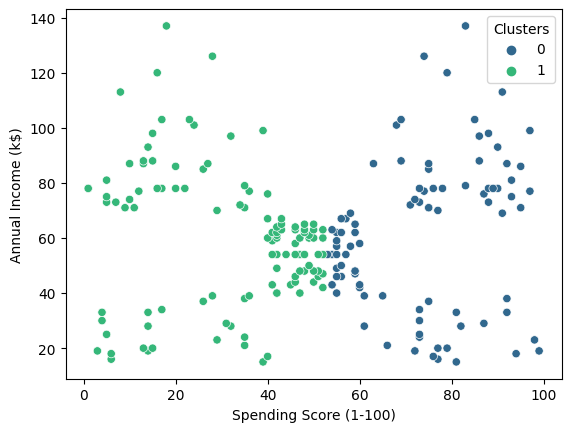

In [30]:
df['Clusters']=km.labels_
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue='Clusters',data=df,palette='viridis')

In [31]:
K=range(2,15)
wss=[]
for k in K:
  kmeans=cluster.KMeans(n_clusters=k)
  kmeans=kmeans.fit(df_scale)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

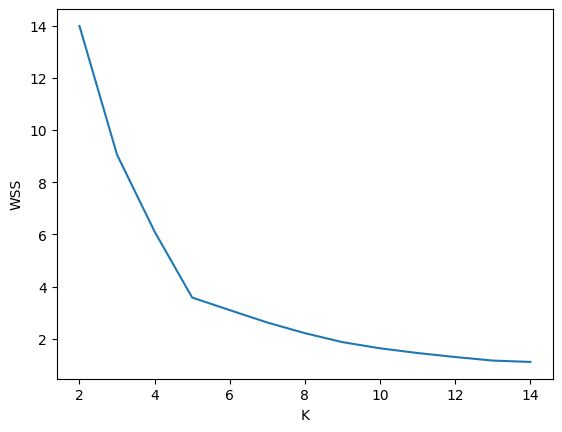

In [34]:
plt.xlabel('K')
plt.ylabel('WSS')
plt.plot(K,wss)

In [44]:
#5 Clusters
km=KMeans(n_clusters=5)
y_predict=km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

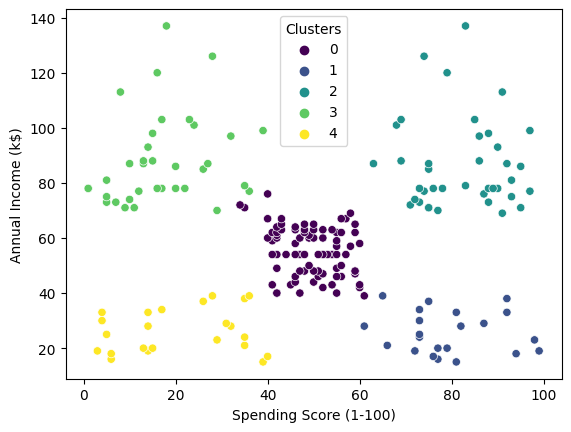

In [45]:
df['Clusters']=km.labels_
sns.scatterplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue='Clusters',data=df,palette='viridis')